# A toolbox for the Sierpinski Gasket




Let $Q = \{ q_0, q_1, q_2\}$ be points in the plane $\mathbb{R}^2$. Then the Sierpinski gasket $S$ is the set obtained by repeated application of the following maps to $Q$

$$ F_i = \frac{1}{2}x + \frac{1}{2}q_i \, \forall i=0,1,2$$

such that $S = \cup_{i=0}^{2}F_i(S)$

We are only concerned with the discrete points of $S$, i.e repeated applications of the maps $F_j$ to the points in $Q$. For example, $F_1F_2F_0F_2q_0$ is a point on the $S$ that we want. Note that the map defined by repeated application of $m$ many $F_i$ maps is termed a "word" of length $m$. As an example, the map $F_1F_2F_0F_2$ is a word of length 4. In short we'll denote it as $F_w$ where $|w| = m$. 

Now we are interested in the following three problems: a) What does $S$ look like? b) If we start with a point in $Q$ and apply a word of length $m$ where does the point end up? c) A related question: If we apply $F_w$ where $|w| = m$ to a segment defined by $q_iq_j$ s.t. $0 \leq i,j \leq 2$ then where does the segment end up? This notebook visualizes (a), (b), and (c). 

In [1]:
using PyPlot

In [2]:


F_0(x,boundary) = (0.5).*x .+ (0.5).*boundary[:,1]
F_1(x,boundary) = (0.5).*x .+ (0.5).*boundary[:,2]
F_2(x,boundary) = (0.5).*x .+ (0.5).*boundary[:,3]

function Sierpinski(bound,x)
    Newpoints = F_0(x,bound)
    Newpoints = hcat(Newpoints, F_1(x,bound))
    Newpoints = hcat(Newpoints, F_2(x,bound))
    return Newpoints
end

function Sierpinski_Gasket(bound, N)

bound1 = bound 
bound0 = bound 
k = bound[:,2]
l = bound[:,1]
bound0[:,1] = k
bound0[:,2] = l
    
Gasket1 = bound1 

for i in 1:N
    Gasket1 = Sierpinski(bound1, Gasket1)
end

Gasket2 = bound0

for i in 1:N
    Gasket2 = Sierpinski(bound0, Gasket2)
end

return plot(Gasket2[1,:], Gasket2[2,:],"r.-")
    
    end 


Sierpinski_Gasket (generic function with 1 method)

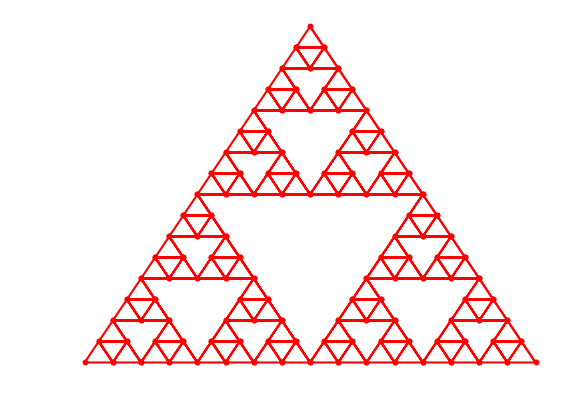

(-1.1, 1.1, -1.1, 1.1)

In [15]:
Sierpinski_Gasket([[0;1] [1;-1] [-1;-1]],4);
Sierpinski_Gasket([[1;-1] [0;1] [-1;-1]],4);
ax = gca()
ax[:axis]("off")

In [141]:
function trajectory(word, boundary, x)
    path = x
    word = word .+ 1 
    for i in 1:size(word)[1]
        path = hcat(path, (0.5).*path[:,i] .+ (0.5).*boundary[:,word[i]])
    end
    return path
end 

trajectory (generic function with 1 method)

In [142]:
trajectory([0,1,2,1,0],[[0;1] [1;-1] [-1;-1]],[0;1])


2×6 Array{Float64,2}:
 0.0  0.0  0.5  -0.25   0.375  0.1875
 1.0  1.0  0.0  -0.5   -0.75   0.125 

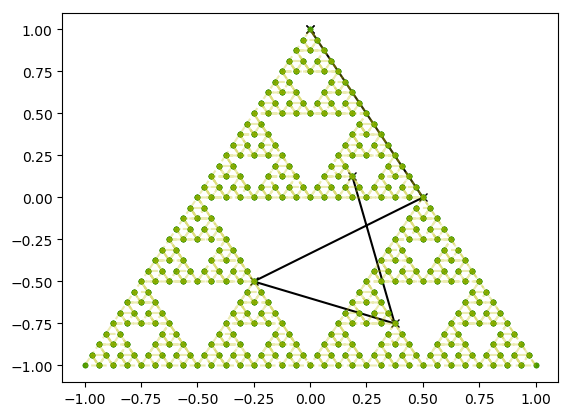

In [143]:
plot(Out[128][1,:],Out[128][2,:],"kx-")
Sierpinski_Gasket([[0;1] [1;-1] [-1;-1]],5);
Sierpinski_Gasket([[1;-1] [0;1] [-1;-1]],5);